In [1]:
import math
import os
import glob
import json
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread

In [2]:
image_path = '/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/SIA/roads/leftImg8bit/val/BLD00002_PS3_K3A_NIA0276.png'

In [3]:
json_path = '/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/roads_label_json_val/BLD00002_PS3_K3A_NIA0276.json'

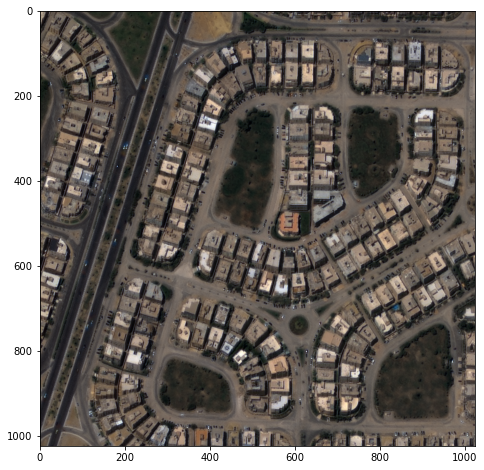

In [4]:
fig = plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
image = imread(image_path)
plt.imshow(image)


In [5]:
with open(json_path) as f:
    json_file = json.load(f)
    print(json.dumps(json_file, indent=2))

{
  "features": [
    {
      "geometry": {
        "coordinates": [
          [
            31.4405428056,
            30.0414645232,
            0.0
          ],
          [
            31.4463825091,
            30.0415336405,
            0.0
          ],
          [
            31.4463032058,
            30.0466143917,
            0.0
          ],
          [
            31.4404632046,
            30.0465452603,
            0.0
          ]
        ],
        "type": "Polygon"
      },
      "properties": {
        "object_imcoords": "EMPTY",
        "building_imcoords": "EMPTY",
        "road_imcoords": "288.6031466547639,0,0,919.8032354581876,0,993.8029311831228,294.79602019621916,43.8897481087173,305.52465442867833,57.317555659461206,318.7086591847022,67.36922874030383,322.0711818464676,56.243331055401704,310.4448355479495,45.7120934191754,303.1153876656694,33.33932789027563,303.76589398497424,16.669663945137813,309.3271413514083,0",
        "image_id": "BLD00002_PS3_K3A_NIA0276.

In [6]:
json_file.keys()

dict_keys(['features', 'type'])

In [7]:
label_dict = {}

In [8]:
def parse_json(json_file):
    polygon_list = []
    label_list = []
    for feature in json_file['features']:
        if feature['properties']['road_imcoords']:
            polygon = list(map(float, feature['properties']['road_imcoords'].split(',')))
            polygon = list(map(math.floor, polygon))
            polygon = np.array(polygon, np.int32).reshape(-1, 1, 2)
            polygon_list.append(polygon)
        
            label = int(feature['properties']['type_id'])
            label_list.append(label)
        
            if label not in label_dict:
                label_dict[label] = feature['properties']['type_name']
    
    return polygon_list, label_list

## Polygon 그리기

In [9]:
bg = np.zeros((1024, 1024, 3), np.uint8)

In [10]:
polygon_list, label_list = parse_json(json_file)

In [11]:
img = cv2.polylines(bg, polygon_list, True, (255, 255, 255))

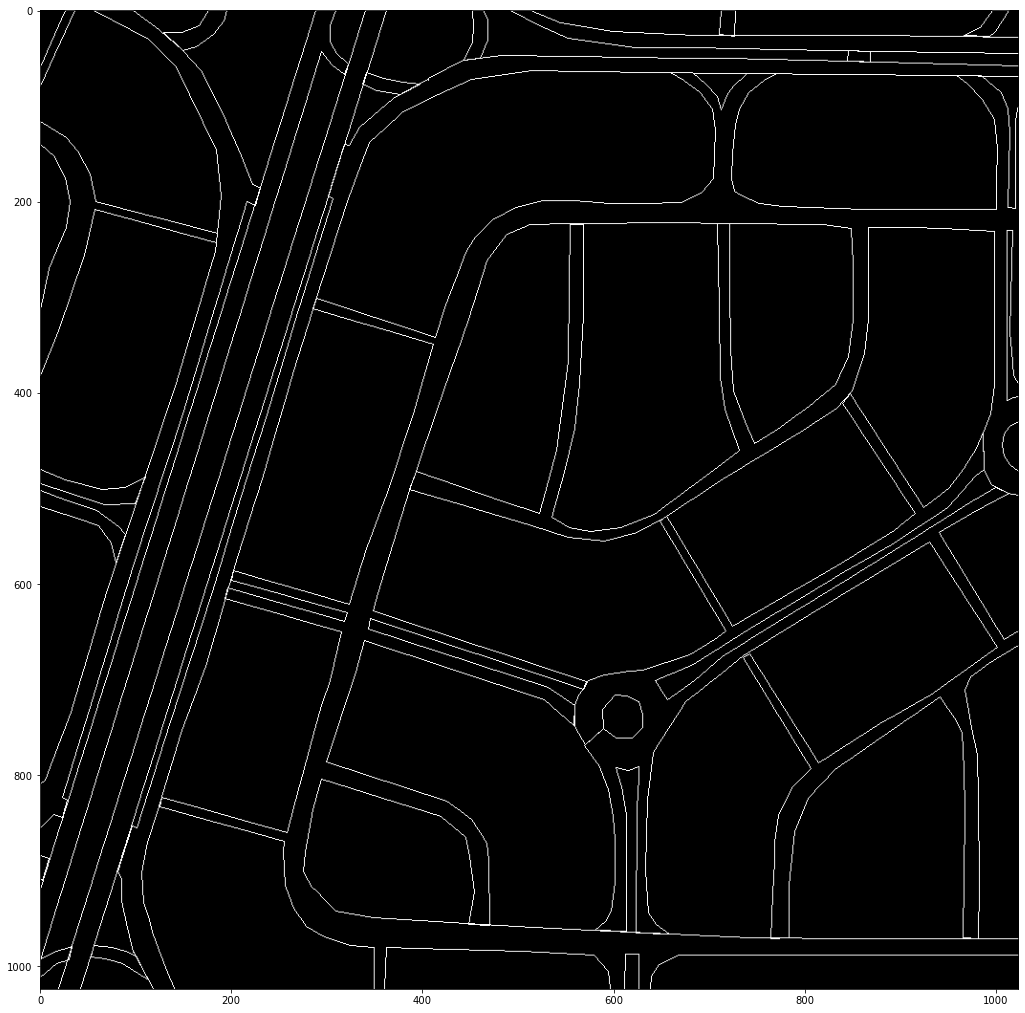

In [12]:
fig = plt.figure(figsize=(18, 18))
plt.imshow(img)

In [13]:
image_folder = '/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/SIA/roads/leftImg8bit/train/'
label_folder = '/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/road_label_json_train/'

In [14]:
import os

file_list = os.listdir(image_folder)
image_files = [file for file in file_list if file.endswith(".png")]

print ("file_list_py: {}".format(image_files))

file_list_py: ['BLD00894_PS3_K3A_NIA0277.png', 'BLD00154_PS3_K3A_NIA0276.png', 'BLD04713_PS3_K3A_NIA0378.png', 'BLD01604_PS3_K3A_NIA0373.png', 'BLD06214_PS3_K3A_NIA0381.png', 'BLD08187_PS3_K3A_NIA0384.png', 'BLD00850_PS3_K3A_NIA0277.png', 'BLD00242_PS3_K3A_NIA0276.png', 'BLD00547_PS3_K3A_NIA0276.png', 'BLD03842_PS3_K3A_NIA0377.png', 'BLD03095_PS3_K3A_NIA0376.png', 'BLD00144_PS3_K3A_NIA0276.png', 'BLD00435_PS3_K3A_NIA0276.png', 'BLD06766_PS3_K3A_NIA0382.png', 'BLD05607_PS3_K3A_NIA0380.png', 'BLD01538_PS3_K3A_NIA0373.png', 'BLD00905_PS3_K3A_NIA0277.png', 'BLD02756_PS3_K3A_NIA0375.png', 'BLD03701_PS3_K3A_NIA0376.png', 'BLD02316_PS3_K3A_NIA0374.png', 'BLD02271_PS3_K3A_NIA0374.png', 'BLD03077_PS3_K3A_NIA0376.png', 'BLD01550_PS3_K3A_NIA0373.png', 'BLD00408_PS3_K3A_NIA0276.png', 'BLD11000_PS3_K3A_NIA0389.png', 'BLD00351_PS3_K3A_NIA0276.png', 'BLD00705_PS3_K3A_NIA0277.png', 'BLD01157_PS3_K3A_NIA0373.png', 'BLD02113_PS3_K3A_NIA0374.png', 'BLD05862_PS3_K3A_NIA0380.png', 'BLD01232_PS3_K3A_NIA0373

In [15]:
file_list = os.listdir(label_folder)
json_files = [file for file in file_list if file.endswith(".json")]

print ("file_list_py: {}".format(json_files))

file_list_py: ['BLD00695_PS3_K3A_NIA0277.json', 'BLD01739_PS3_K3A_NIA0373.json', 'BLD01458_PS3_K3A_NIA0373.json', 'BLD02265_PS3_K3A_NIA0374.json', 'BLD02058_PS3_K3A_NIA0374.json', 'BLD00242_PS3_K3A_NIA0276.json', 'BLD03098_PS3_K3A_NIA0376.json', 'BLD00517_PS3_K3A_NIA0276.json', 'BLD01496_PS3_K3A_NIA0373.json', 'BLD00349_PS3_K3A_NIA0276.json', 'BLD02756_PS3_K3A_NIA0375.json', 'BLD00164_PS3_K3A_NIA0276.json', 'BLD02941_PS3_K3A_NIA0375.json', 'BLD00265_PS3_K3A_NIA0276.json', 'BLD00919_PS3_K3A_NIA0277.json', 'BLD06879_PS3_K3A_NIA0382.json', 'BLD02317_PS3_K3A_NIA0374.json', 'BLD10471_PS3_K3A_NIA0388.json', 'BLD06370_PS3_K3A_NIA0381.json', 'BLD00941_PS3_K3A_NIA0277.json', 'BLD08446_PS3_K3A_NIA0384.json', 'BLD02215_PS3_K3A_NIA0374.json', 'BLD09828_PS3_K3A_NIA0387.json', 'BLD11154_PS3_K3A_NIA0390.json', 'BLD00273_PS3_K3A_NIA0276.json', 'BLD01090_PS3_K3A_NIA0277.json', 'BLD00743_PS3_K3A_NIA0277.json', 'BLD08098_PS3_K3A_NIA0384.json', 'BLD00557_PS3_K3A_NIA0276.json', 'BLD03200_PS3_K3A_NIA0376.js

In [16]:
image_files.sort()
json_files.sort()


In [17]:
label_dict = {}

In [18]:
def parse_json(json_file):
    polygon_list = []
    label_list = []
    for feature in json_file['features']:
        if feature['properties']['road_imcoords']:
            polygon = list(map(float, feature['properties']['road_imcoords'].split(',')))
            polygon = list(map(math.floor, polygon))
            polygon = np.array(polygon, np.int32).reshape(-1, 1, 2)
            polygon_list.append(polygon)
        
            label = int(feature['properties']['type_id'])
            label_list.append(label)
        
            if label not in label_dict:
                label_dict[label] = feature['properties']['type_name']
    
    return polygon_list, label_list

In [19]:
def show_label(image_path, label_path, polygon_list):
        fig = plt.figure(figsize=(18, 8))
        plt.subplot(1, 2, 1)
        # image = imread(image_path)
        image = np.zeros((1024, 1024, 3), np.uint8)
        # img = cv2.polylines(image, polygon_list, True, (255, 255, 255))
        img = cv2.fillPoly(image, polygon_list, (255, 255, 255))
        plt.imshow(img)
        plt.subplot(1, 2, 2)
        image_label = imread(label_path)
        plt.imshow(image_label)

In [20]:
def draw_label(image_path, polygon_list):
        filename = os.path.splitext(os.path.basename(image_path))[0]
        savepath = '/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/'
        # image = imread(image_path)
        image = np.zeros((1024, 1024, 3), np.uint8)
        # img = cv2.polylines(image, polygon_list, True, (255, 255, 255))
        img = cv2.fillPoly(image, polygon_list, (255, 255, 255))
        img = Image.fromarray(img)
        img.save(f'{savepath}{filename}.png')
        print(f'{savepath}{filename}.png saved!')

In [21]:
def check_filename(file_path):
    print(os.path.splitext(os.path.basename(file_path))[0])
    return os.path.splitext(os.path.basename(file_path))[0]

In [22]:
for i in range(len(image_files)):
    image_path = image_files[i]
    json_path = json_files[i]
    if check_filename(image_path) == check_filename(json_path):
        json_path = label_folder + json_path
        with open(json_path) as f:
            json_file = json.load(f)
            polygon_list, label_list = parse_json(json_file)
            # show_label(image_path, label_path, polygon_list)
            draw_label(image_path, polygon_list)
    else:
        print("filename Different!")

BLD00001_PS3_K3A_NIA0276
BLD00001_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00001_PS3_K3A_NIA0276.png saved!
BLD00003_PS3_K3A_NIA0276
BLD00003_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00003_PS3_K3A_NIA0276.png saved!
BLD00006_PS3_K3A_NIA0276
BLD00006_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00006_PS3_K3A_NIA0276.png saved!
BLD00007_PS3_K3A_NIA0276
BLD00007_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00007_PS3_K3A_NIA0276.png saved!
BLD00009_PS3_K3A_NIA0276
BLD00009_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00009_PS3_K3A_NIA0276.png saved!
BLD00011_PS3_K3A_NIA0276
BLD00011_PS3_K3A_NIA0276
/home/aiffel-dj

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00079_PS3_K3A_NIA0276.png saved!
BLD00080_PS3_K3A_NIA0276
BLD00080_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00080_PS3_K3A_NIA0276.png saved!
BLD00084_PS3_K3A_NIA0276
BLD00084_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00084_PS3_K3A_NIA0276.png saved!
BLD00085_PS3_K3A_NIA0276
BLD00085_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00085_PS3_K3A_NIA0276.png saved!
BLD00087_PS3_K3A_NIA0276
BLD00087_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00087_PS3_K3A_NIA0276.png saved!
BLD00088_PS3_K3A_NIA0276
BLD00088_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00148_PS3_K3A_NIA0276.png saved!
BLD00149_PS3_K3A_NIA0276
BLD00149_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00149_PS3_K3A_NIA0276.png saved!
BLD00150_PS3_K3A_NIA0276
BLD00150_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00150_PS3_K3A_NIA0276.png saved!
BLD00151_PS3_K3A_NIA0276
BLD00151_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00151_PS3_K3A_NIA0276.png saved!
BLD00154_PS3_K3A_NIA0276
BLD00154_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00154_PS3_K3A_NIA0276.png saved!
BLD00155_PS3_K3A_NIA0276
BLD00155_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00218_PS3_K3A_NIA0276.png saved!
BLD00220_PS3_K3A_NIA0276
BLD00220_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00220_PS3_K3A_NIA0276.png saved!
BLD00224_PS3_K3A_NIA0276
BLD00224_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00224_PS3_K3A_NIA0276.png saved!
BLD00225_PS3_K3A_NIA0276
BLD00225_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00225_PS3_K3A_NIA0276.png saved!
BLD00228_PS3_K3A_NIA0276
BLD00228_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00228_PS3_K3A_NIA0276.png saved!
BLD00232_PS3_K3A_NIA0276
BLD00232_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00308_PS3_K3A_NIA0276.png saved!
BLD00309_PS3_K3A_NIA0276
BLD00309_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00309_PS3_K3A_NIA0276.png saved!
BLD00310_PS3_K3A_NIA0276
BLD00310_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00310_PS3_K3A_NIA0276.png saved!
BLD00311_PS3_K3A_NIA0276
BLD00311_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00311_PS3_K3A_NIA0276.png saved!
BLD00312_PS3_K3A_NIA0276
BLD00312_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00312_PS3_K3A_NIA0276.png saved!
BLD00314_PS3_K3A_NIA0276
BLD00314_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00458_PS3_K3A_NIA0276.png saved!
BLD00459_PS3_K3A_NIA0276
BLD00459_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00459_PS3_K3A_NIA0276.png saved!
BLD00491_PS3_K3A_NIA0276
BLD00491_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00491_PS3_K3A_NIA0276.png saved!
BLD00517_PS3_K3A_NIA0276
BLD00517_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00517_PS3_K3A_NIA0276.png saved!
BLD00540_PS3_K3A_NIA0276
BLD00540_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00540_PS3_K3A_NIA0276.png saved!
BLD00541_PS3_K3A_NIA0276
BLD00541_PS3_K3A_NIA0276
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00655_PS3_K3A_NIA0277.png saved!
BLD00656_PS3_K3A_NIA0277
BLD00656_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00656_PS3_K3A_NIA0277.png saved!
BLD00658_PS3_K3A_NIA0277
BLD00658_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00658_PS3_K3A_NIA0277.png saved!
BLD00660_PS3_K3A_NIA0277
BLD00660_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00660_PS3_K3A_NIA0277.png saved!
BLD00661_PS3_K3A_NIA0277
BLD00661_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00661_PS3_K3A_NIA0277.png saved!
BLD00663_PS3_K3A_NIA0277
BLD00663_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00783_PS3_K3A_NIA0277.png saved!
BLD00785_PS3_K3A_NIA0277
BLD00785_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00785_PS3_K3A_NIA0277.png saved!
BLD00786_PS3_K3A_NIA0277
BLD00786_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00786_PS3_K3A_NIA0277.png saved!
BLD00787_PS3_K3A_NIA0277
BLD00787_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00787_PS3_K3A_NIA0277.png saved!
BLD00789_PS3_K3A_NIA0277
BLD00789_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00789_PS3_K3A_NIA0277.png saved!
BLD00790_PS3_K3A_NIA0277
BLD00790_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00878_PS3_K3A_NIA0277.png saved!
BLD00879_PS3_K3A_NIA0277
BLD00879_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00879_PS3_K3A_NIA0277.png saved!
BLD00880_PS3_K3A_NIA0277
BLD00880_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00880_PS3_K3A_NIA0277.png saved!
BLD00883_PS3_K3A_NIA0277
BLD00883_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00883_PS3_K3A_NIA0277.png saved!
BLD00884_PS3_K3A_NIA0277
BLD00884_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00884_PS3_K3A_NIA0277.png saved!
BLD00885_PS3_K3A_NIA0277
BLD00885_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00947_PS3_K3A_NIA0277.png saved!
BLD00948_PS3_K3A_NIA0277
BLD00948_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00948_PS3_K3A_NIA0277.png saved!
BLD00949_PS3_K3A_NIA0277
BLD00949_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00949_PS3_K3A_NIA0277.png saved!
BLD00951_PS3_K3A_NIA0277
BLD00951_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00951_PS3_K3A_NIA0277.png saved!
BLD00952_PS3_K3A_NIA0277
BLD00952_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD00952_PS3_K3A_NIA0277.png saved!
BLD00966_PS3_K3A_NIA0277
BLD00966_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD01037_PS3_K3A_NIA0277.png saved!
BLD01038_PS3_K3A_NIA0277
BLD01038_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD01038_PS3_K3A_NIA0277.png saved!
BLD01040_PS3_K3A_NIA0277
BLD01040_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD01040_PS3_K3A_NIA0277.png saved!
BLD01041_PS3_K3A_NIA0277
BLD01041_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD01041_PS3_K3A_NIA0277.png saved!
BLD01042_PS3_K3A_NIA0277
BLD01042_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD01042_PS3_K3A_NIA0277.png saved!
BLD01043_PS3_K3A_NIA0277
BLD01043_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD01123_PS3_K3A_NIA0277.png saved!
BLD01124_PS3_K3A_NIA0277
BLD01124_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD01124_PS3_K3A_NIA0277.png saved!
BLD01128_PS3_K3A_NIA0277
BLD01128_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD01128_PS3_K3A_NIA0277.png saved!
BLD01130_PS3_K3A_NIA0277
BLD01130_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD01130_PS3_K3A_NIA0277.png saved!
BLD01132_PS3_K3A_NIA0277
BLD01132_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD01132_PS3_K3A_NIA0277.png saved!
BLD01134_PS3_K3A_NIA0277
BLD01134_PS3_K3A_NIA0277
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD01338_PS3_K3A_NIA0373.png saved!
BLD01339_PS3_K3A_NIA0373
BLD01339_PS3_K3A_NIA0373
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD01339_PS3_K3A_NIA0373.png saved!
BLD01342_PS3_K3A_NIA0373
BLD01342_PS3_K3A_NIA0373
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD01342_PS3_K3A_NIA0373.png saved!
BLD01343_PS3_K3A_NIA0373
BLD01343_PS3_K3A_NIA0373
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD01343_PS3_K3A_NIA0373.png saved!
BLD01346_PS3_K3A_NIA0373
BLD01346_PS3_K3A_NIA0373
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD01346_PS3_K3A_NIA0373.png saved!
BLD01356_PS3_K3A_NIA0373
BLD01356_PS3_K3A_NIA0373
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD01549_PS3_K3A_NIA0373.png saved!
BLD01550_PS3_K3A_NIA0373
BLD01550_PS3_K3A_NIA0373
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD01550_PS3_K3A_NIA0373.png saved!
BLD01554_PS3_K3A_NIA0373
BLD01554_PS3_K3A_NIA0373
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD01554_PS3_K3A_NIA0373.png saved!
BLD01555_PS3_K3A_NIA0373
BLD01555_PS3_K3A_NIA0373
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD01555_PS3_K3A_NIA0373.png saved!
BLD01563_PS3_K3A_NIA0373
BLD01563_PS3_K3A_NIA0373
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD01563_PS3_K3A_NIA0373.png saved!
BLD01578_PS3_K3A_NIA0373
BLD01578_PS3_K3A_NIA0373
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD02066_PS3_K3A_NIA0374.png saved!
BLD02068_PS3_K3A_NIA0374
BLD02068_PS3_K3A_NIA0374
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD02068_PS3_K3A_NIA0374.png saved!
BLD02069_PS3_K3A_NIA0374
BLD02069_PS3_K3A_NIA0374
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD02069_PS3_K3A_NIA0374.png saved!
BLD02070_PS3_K3A_NIA0374
BLD02070_PS3_K3A_NIA0374
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD02070_PS3_K3A_NIA0374.png saved!
BLD02072_PS3_K3A_NIA0374
BLD02072_PS3_K3A_NIA0374
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD02072_PS3_K3A_NIA0374.png saved!
BLD02103_PS3_K3A_NIA0374
BLD02103_PS3_K3A_NIA0374
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD02320_PS3_K3A_NIA0374.png saved!
BLD02321_PS3_K3A_NIA0374
BLD02321_PS3_K3A_NIA0374
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD02321_PS3_K3A_NIA0374.png saved!
BLD02322_PS3_K3A_NIA0374
BLD02322_PS3_K3A_NIA0374
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD02322_PS3_K3A_NIA0374.png saved!
BLD02323_PS3_K3A_NIA0374
BLD02323_PS3_K3A_NIA0374
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD02323_PS3_K3A_NIA0374.png saved!
BLD02325_PS3_K3A_NIA0374
BLD02325_PS3_K3A_NIA0374
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD02325_PS3_K3A_NIA0374.png saved!
BLD02326_PS3_K3A_NIA0374
BLD02326_PS3_K3A_NIA0374
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD02531_PS3_K3A_NIA0375.png saved!
BLD02539_PS3_K3A_NIA0375
BLD02539_PS3_K3A_NIA0375
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD02539_PS3_K3A_NIA0375.png saved!
BLD02543_PS3_K3A_NIA0375
BLD02543_PS3_K3A_NIA0375
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD02543_PS3_K3A_NIA0375.png saved!
BLD02544_PS3_K3A_NIA0375
BLD02544_PS3_K3A_NIA0375
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD02544_PS3_K3A_NIA0375.png saved!
BLD02545_PS3_K3A_NIA0375
BLD02545_PS3_K3A_NIA0375
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD02545_PS3_K3A_NIA0375.png saved!
BLD02546_PS3_K3A_NIA0375
BLD02546_PS3_K3A_NIA0375
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD02876_PS3_K3A_NIA0375.png saved!
BLD02917_PS3_K3A_NIA0375
BLD02917_PS3_K3A_NIA0375
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD02917_PS3_K3A_NIA0375.png saved!
BLD02918_PS3_K3A_NIA0375
BLD02918_PS3_K3A_NIA0375
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD02918_PS3_K3A_NIA0375.png saved!
BLD02920_PS3_K3A_NIA0375
BLD02920_PS3_K3A_NIA0375
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD02920_PS3_K3A_NIA0375.png saved!
BLD02921_PS3_K3A_NIA0375
BLD02921_PS3_K3A_NIA0375
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD02921_PS3_K3A_NIA0375.png saved!
BLD02924_PS3_K3A_NIA0375
BLD02924_PS3_K3A_NIA0375
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD03304_PS3_K3A_NIA0376.png saved!
BLD03305_PS3_K3A_NIA0376
BLD03305_PS3_K3A_NIA0376
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD03305_PS3_K3A_NIA0376.png saved!
BLD03306_PS3_K3A_NIA0376
BLD03306_PS3_K3A_NIA0376
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD03306_PS3_K3A_NIA0376.png saved!
BLD03307_PS3_K3A_NIA0376
BLD03307_PS3_K3A_NIA0376
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD03307_PS3_K3A_NIA0376.png saved!
BLD03309_PS3_K3A_NIA0376
BLD03309_PS3_K3A_NIA0376
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD03309_PS3_K3A_NIA0376.png saved!
BLD03310_PS3_K3A_NIA0376
BLD03310_PS3_K3A_NIA0376
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD03586_PS3_K3A_NIA0376.png saved!
BLD03587_PS3_K3A_NIA0376
BLD03587_PS3_K3A_NIA0376
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD03587_PS3_K3A_NIA0376.png saved!
BLD03589_PS3_K3A_NIA0376
BLD03589_PS3_K3A_NIA0376
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD03589_PS3_K3A_NIA0376.png saved!
BLD03592_PS3_K3A_NIA0376
BLD03592_PS3_K3A_NIA0376
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD03592_PS3_K3A_NIA0376.png saved!
BLD03593_PS3_K3A_NIA0376
BLD03593_PS3_K3A_NIA0376
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD03593_PS3_K3A_NIA0376.png saved!
BLD03611_PS3_K3A_NIA0376
BLD03611_PS3_K3A_NIA0376
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD04328_PS3_K3A_NIA0378.png saved!
BLD04381_PS3_K3A_NIA0378
BLD04381_PS3_K3A_NIA0378
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD04381_PS3_K3A_NIA0378.png saved!
BLD04630_PS3_K3A_NIA0378
BLD04630_PS3_K3A_NIA0378
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD04630_PS3_K3A_NIA0378.png saved!
BLD04713_PS3_K3A_NIA0378
BLD04713_PS3_K3A_NIA0378
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD04713_PS3_K3A_NIA0378.png saved!
BLD04714_PS3_K3A_NIA0378
BLD04714_PS3_K3A_NIA0378
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD04714_PS3_K3A_NIA0378.png saved!
BLD04757_PS3_K3A_NIA0378
BLD04757_PS3_K3A_NIA0378
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD06244_PS3_K3A_NIA0381.png saved!
BLD06278_PS3_K3A_NIA0381
BLD06278_PS3_K3A_NIA0381
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD06278_PS3_K3A_NIA0381.png saved!
BLD06307_PS3_K3A_NIA0381
BLD06307_PS3_K3A_NIA0381
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD06307_PS3_K3A_NIA0381.png saved!
BLD06315_PS3_K3A_NIA0381
BLD06315_PS3_K3A_NIA0381
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD06315_PS3_K3A_NIA0381.png saved!
BLD06336_PS3_K3A_NIA0381
BLD06336_PS3_K3A_NIA0381
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD06336_PS3_K3A_NIA0381.png saved!
BLD06367_PS3_K3A_NIA0381
BLD06367_PS3_K3A_NIA0381
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD07949_PS3_K3A_NIA0383.png saved!
BLD07993_PS3_K3A_NIA0384
BLD07993_PS3_K3A_NIA0384
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD07993_PS3_K3A_NIA0384.png saved!
BLD08016_PS3_K3A_NIA0384
BLD08016_PS3_K3A_NIA0384
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD08016_PS3_K3A_NIA0384.png saved!
BLD08084_PS3_K3A_NIA0384
BLD08084_PS3_K3A_NIA0384
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD08084_PS3_K3A_NIA0384.png saved!
BLD08093_PS3_K3A_NIA0384
BLD08093_PS3_K3A_NIA0384
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD08093_PS3_K3A_NIA0384.png saved!
BLD08098_PS3_K3A_NIA0384
BLD08098_PS3_K3A_NIA0384
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD09426_PS3_K3A_NIA0386.png saved!
BLD09447_PS3_K3A_NIA0386
BLD09447_PS3_K3A_NIA0386
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD09447_PS3_K3A_NIA0386.png saved!
BLD09469_PS3_K3A_NIA0386
BLD09469_PS3_K3A_NIA0386
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD09469_PS3_K3A_NIA0386.png saved!
BLD09505_PS3_K3A_NIA0387
BLD09505_PS3_K3A_NIA0387
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD09505_PS3_K3A_NIA0387.png saved!
BLD09645_PS3_K3A_NIA0387
BLD09645_PS3_K3A_NIA0387
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD09645_PS3_K3A_NIA0387.png saved!
BLD09664_PS3_K3A_NIA0387
BLD09664_PS3_K3A_NIA0387
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD11258_PS3_K3A_NIA0390.png saved!
BLD11260_PS3_K3A_NIA0390
BLD11260_PS3_K3A_NIA0390
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD11260_PS3_K3A_NIA0390.png saved!
BLD11285_PS3_K3A_NIA0390
BLD11285_PS3_K3A_NIA0390
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD11285_PS3_K3A_NIA0390.png saved!
BLD11305_PS3_K3A_NIA0390
BLD11305_PS3_K3A_NIA0390
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD11305_PS3_K3A_NIA0390.png saved!
BLD11306_PS3_K3A_NIA0390
BLD11306_PS3_K3A_NIA0390
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/road_csv/png_train_road/BLD11306_PS3_K3A_NIA0390.png saved!
BLD11321_PS3_K3A_NIA0390
BLD11321_PS3_K3A_NIA0390
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/da

In [23]:
len(image_files)

1144